In [1]:
import os
import pickle
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

In [29]:
table = pd.read_excel(open('novel.xlsx', 'rb'),
                      sheet_name='Лист1',
                      header=None,
                      names=[
                          "Province/State",
                          "Country",
                          "Date last updated",
                          "Confirmed",
                          "Recovered",
                          "Deaths",
                      ]
                     )

In [30]:
table = table.fillna(0)

In [31]:
list_table = table.values.tolist()

In [32]:
with open('novel_ncov.pickle', 'wb') as file:
    pickle.dump(list_table, file)

In [33]:
with open('novel_ncov.pickle', 'rb') as file:
    list_table = pickle.load(file)

In [34]:
list_table[0]

['Province/State',
 'Country',
 'Date last updated',
 'Confirmed',
 'Recovered',
 'Deaths']

In [35]:
PROVINCE = 0
COUNTRY = 1
DATE_UPDATE = 2
CONFIRMED = 3
RECOVERED = 4
DEATHS = 5

In [36]:
'2020-02-' in str(list_table[-1][DATE_UPDATE])

True

In [37]:
set_country = set()
for row in list_table:
    if '2020-02-02' in str(row[DATE_UPDATE]):
        set_country.add(row[COUNTRY])

In [38]:
set_country

{'Australia',
 'Germany',
 'Hong Kong',
 'India',
 'Macau',
 'Mainland China',
 'Philippines',
 'Singapore',
 'South Korea',
 'Thailand',
 'US',
 'United Arab Emirates'}

In [39]:
last_day_2020feb = []
for row in list_table:
    if '2020-02-02' in str(row[DATE_UPDATE]):
        last_day_2020feb.append(row)

In [40]:
final_dict = dict.fromkeys(set_country, 0)
for row in last_day_2020feb:
    if row[COUNTRY] in final_dict:
        final_dict[row[COUNTRY]] += row[CONFIRMED]

In [41]:
final_dict

{'Singapore': 36,
 'Hong Kong': 29,
 'Germany': 10,
 'Macau': 8,
 'Australia': 4,
 'United Arab Emirates': 5,
 'Philippines': 4,
 'South Korea': 30,
 'India': 2,
 'Thailand': 19,
 'Mainland China': 20985,
 'US': 2}

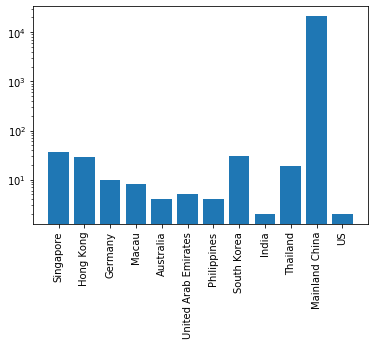

In [42]:
plt.close()
plt.bar(final_dict.keys(), final_dict.values())
plt.yscale('log')
plt.xticks(range(len(final_dict.values())), final_dict.keys(), rotation='vertical')
plt.show()

In [43]:
days_china = {}
for row in list_table[1:]:
    if 'China' in row[COUNTRY]:
        if str(row[DATE_UPDATE])[:10] in days_china:
            days_china[str(row[DATE_UPDATE])[:10]] += row[CONFIRMED]
        else:
            days_china[str(row[DATE_UPDATE])[:10]] = row[CONFIRMED]

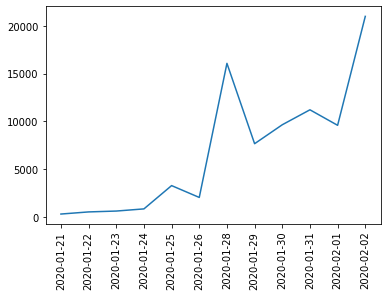

In [44]:
plt.close()
plt.plot(list(days_china.values()))
#plt.yscale('log')
plt.xticks(range(len(days_china.values())), days_china.keys(), rotation='vertical')
plt.show()

In [45]:
days_china

{'2020-01-21': 327,
 '2020-01-22': 549,
 '2020-01-23': 639,
 '2020-01-24': 865,
 '2020-01-25': 3299,
 '2020-01-26': 2062,
 '2020-01-28': 16074,
 '2020-01-29': 7678,
 '2020-01-30': 9658,
 '2020-01-31': 11221,
 '2020-02-01': 9600,
 '2020-02-02': 20985}